In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np

In [3]:
from data_generation.data_generator import generate_synthetic_data

In [4]:
import logging

In [5]:
# Set up logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

In [6]:

# Generate synthetic data
generated_data = generate_synthetic_data(
    num_users=1000,
    alpha=0.23,
    countries=['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],
    platforms=['iOS', 'Android', 'Web', 'Desktop'],
    user_segments=['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],
    ab_groups=['a1', 'a2', 'b'],
    noise_level=0,
    base_increase_percentage=0,
)

In [7]:
print(generated_data.head())

   userid country platform user_segment abgroup  age  engagement_score  \
0       1      IN      iOS    Segment_2      a2   24                 8   
1       2      FR  Android    Segment_3      a2   19                 8   
2       3      IN      iOS    Segment_2      a1   37                10   
3       4      FR  Desktop    Segment_1      a1   26                 5   
4       5      AU      iOS    Segment_3      a2   58                 7   

   pre_test_value   value  
0            2.60  2.6000  
1            3.20  3.0768  
2            3.56  3.0056  
3            3.88  3.1716  
4            3.20  4.1856  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `generated_data` is your DataFrame
def plot_correlation(df):
    plt.figure(figsize=(10, 6))
    
    # Create a scatter plot
    sns.scatterplot(x='pre_test_value', y='value', data=df, alpha=0.9)
    
    # Add title and labels
    plt.title('Correlation between Pre-Test Value and Value')
    plt.xlabel('Pre-Test Value')
    plt.ylabel('Value')
    
    # Show plot
    plt.show()

# Example usage
plot_correlation(generated_data)

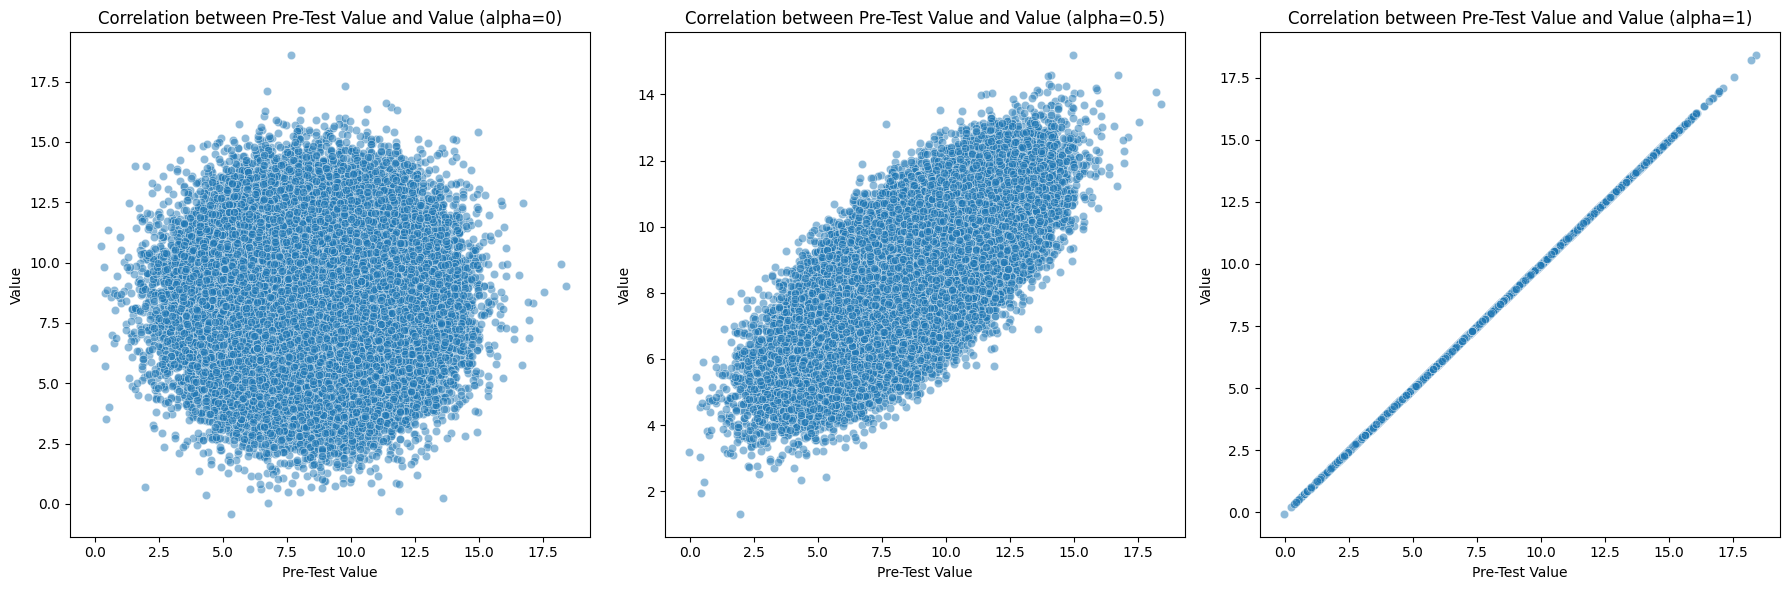

In [9]:
# Generate synthetic data for different alpha values
generated_data_alpha_0 = generate_synthetic_data(
    num_users=100000,
    alpha=0,
    countries=['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],
    platforms=['iOS', 'Android', 'Web', 'Desktop'],
    user_segments=['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],
    ab_groups=['a1', 'a2', 'b'],
    noise_level=2,
    base_increase_percentage=0.1,
)

generated_data_alpha_0_5 = generate_synthetic_data(
    num_users=100000,
    alpha=0.5,
    countries=['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],
    platforms=['iOS', 'Android', 'Web', 'Desktop'],
    user_segments=['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],
    ab_groups=['a1', 'a2', 'b'],
    noise_level=2,
    base_increase_percentage=0.1,
)

generated_data_alpha_1 = generate_synthetic_data(
    num_users=100000,
    alpha=1,
    countries=['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],
    platforms=['iOS', 'Android', 'Web', 'Desktop'],
    user_segments=['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],
    ab_groups=['a1', 'a2', 'b'],
    noise_level=2,
    base_increase_percentage=0.1,
)

# Plotting the graphs in a single row
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

def plot_correlation_custom(ax, df, title):
    sns.scatterplot(x='pre_test_value', y='value', data=df, alpha=0.5, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Pre-Test Value')
    ax.set_ylabel('Value')

plot_correlation_custom(ax=axs[0], df=generated_data_alpha_0, title='Correlation between Pre-Test Value and Value (alpha=0)')
plot_correlation_custom(ax=axs[1], df=generated_data_alpha_0_5, title='Correlation between Pre-Test Value and Value (alpha=0.5)')
plot_correlation_custom(ax=axs[2], df=generated_data_alpha_1, title='Correlation between Pre-Test Value and Value (alpha=1)')

plt.tight_layout()
plt.show()